In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix

C:\Users\DELL\Anaconda3\envs\work\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\Anaconda3\envs\work\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\Anaconda3\envs\work\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\Anaconda3\envs\work\lib\site-packages\tensorflow\python\framework

In [2]:
data_df = pd.read_csv('Consumer_Complaints.csv')
data_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


In [3]:
data_df.isnull().sum()

Date received                        0
Product                              0
Sub-product                     235170
Issue                                0
Sub-issue                       496157
Consumer Complaint              747196
Company Public Response         706646
Company                              0
State                            12360
ZIP code                         16718
Tags                            883422
Consumer consent provided?      533099
Submitted via                        0
Date Sent to Company                 0
Company Response to Consumer         3
Timely response?                     0
Consumer disputed?              256456
Complaint ID                         0
dtype: int64

In [4]:
data_df.dropna(axis=0, inplace=True)
data_df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
300,03-01-2016,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt resulted from identity theft,I was called on my cell phone by First Nationa...,Company believes it acted appropriately as aut...,"First National Collection Bureau, Inc.",CA,921XX,Servicemember,Consent provided,Web,03-01-2016,Closed with explanation,Yes,No,1809977
316,08/13/2015,Debt collection,Medical,Communication tactics,Called after sent written cease of comm,I sent a cease and desist letter to a medical ...,Company believes complaint caused principally ...,"JP RECOVERY SERVICES, INC.",OH,440XX,Servicemember,Consent provided,Web,08/25/2015,Closed,Yes,Yes,1518155
1460,03/23/2017,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt was paid,"Phoenix Financial Services, LLC continues to r...",Company believes it acted appropriately as aut...,Phoenix Financial Services LLC,CO,802XX,Servicemember,Consent provided,Web,03/23/2017,Closed with explanation,Yes,No,2400971
1648,06-02-2016,Debt collection,Medical,Disclosure verification of debt,Right to dispute notice not received,ai broke some ribs while on a fishing trip to ...,Company believes it acted appropriately as aut...,"Credit Bureau Systems, Inc.",IL,629XX,Older American,Consent provided,Web,06-02-2016,Closed with explanation,Yes,No,1951609
2301,08-10-2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,Hi my name XXXX XXXX XXXX this company reporte...,Company believes it acted appropriately as aut...,ERC,CA,945XX,Servicemember,Consent provided,Web,08-10-2015,Closed with non-monetary relief,Yes,No,1511183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024825,11/27/2016,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,After submitting an initial complaint to CFPB ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",VA,220XX,Older American,Consent provided,Web,11/27/2016,Closed with monetary relief,Yes,Yes,2224350
1024828,12/15/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,I contacted XXXX to inquire about lowering my ...,Company has responded to the consumer and the ...,"I.C. System, Inc.",AZ,850XX,Older American,Consent provided,Web,12/15/2016,Closed with explanation,Yes,No,2251901
1024833,11/22/2016,Debt collection,I do not know,Disclosure verification of debt,Not disclosed as an attempt to collect,Making harassing telephone calls but will not ...,Company believes it acted appropriately as aut...,Phoenix Financial Services LLC,TX,772XX,Servicemember,Consent provided,Web,11/22/2016,Closed with explanation,Yes,No,2219250
1024964,01/16/2017,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,Procollect calls me all the time. They must ha...,Company has responded to the consumer and the ...,"ProCollect, Inc",TX,751XX,Older American,Consent provided,Web,01/16/2017,Closed with explanation,No,Yes,2290370


In [5]:
comp = data_df[['Product', 'Consumer Complaint']]
comp['Product'].unique()

array(['Debt collection', 'Student loan'], dtype=object)

In [6]:
lemmatizer = WordNetLemmatizer() 
tokenizer = RegexpTokenizer(r'\w+')

In [7]:
def sentence_clean(sentence):
    word_list = tokenizer.tokenize(sentence)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

In [8]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(comp['Consumer Complaint']).toarray()
labels = comp.Product
features.shape

(3105, 7877)

In [9]:
N = 2
for Product, category_id in sorted(comp.items()):
  features_chi2 = chi2(features, labels == Product)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(comp['Consumer Complaint'], comp['Product'], random_state = 0)
count_vect = CountVectorizer()

In [11]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [12]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [13]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [14]:
model = LinearSVC()
entry = []
cv_df = pd.DataFrame(index=range(5))
acc = cross_val_score(model, features, labels, scoring='accuracy', cv=5)
for fold_idx, accuracy in enumerate(acc):
    entry.append(('LinearSVC', fold_idx, accuracy))
cv_df = pd.DataFrame(entry, columns=['model_name', 'fold_idx', 'accuracy'])

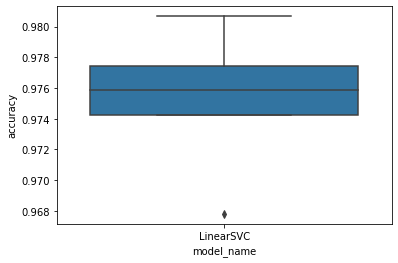

In [15]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
#sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [16]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC    0.975201
Name: accuracy, dtype: float64